# Standard Import

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

# How I convered my mailbox

In [4]:
mbox = mailbox.mbox('Sent.mbox')

The easiest way to get these data into Pandas is to build a CSV file from them. We use the module csv to write out the CSV file as we loop over the mailbox object. We save only subject, from, to, and date, and we write a simple header at the top with the names of columns.

In [5]:
with open('mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['subject','from','to','date'])
    
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['to'], message['date']])

All done! Thanks to Justin Ellis for inspiration with https://jellis18.github.io/post/2018-01-17-mail-analysis.

# Moving On

In [6]:
messages = pd.read_csv('mbox-anonymized.csv')

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1030 non-null   object
 1   from     1029 non-null   object
 2   to       1030 non-null   object
 3   date     1030 non-null   object
dtypes: object(4)
memory usage: 32.3+ KB


In [8]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [9]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [10]:
re.search('<(.+)>',messages['from'][0])

<re.Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [11]:
re.search('<(.+)>',messages['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [12]:
re.search('<(.+)>',messages['from'][0]).group(1)

'Michele.Vallisneri@jpl.nasa.gov'

In [13]:
re.search('<(.+)>','Michele.Vallisneri@jpl.nasa.gov').group(1)

AttributeError: 'NoneType' object has no attribute 'group'

In [14]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [15]:
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [16]:
message['from']=messages['from'].apply(clean_address)

TypeError: expected string or bytes-like object

In [17]:
%debug

> /Users/muhammadimran/opt/anaconda3/lib/python3.9/re.py(201)search()
    199     """Scan through string looking for a match to the pattern, returning
    200     a Match object, or None if no match was found."""
--> 201     return _compile(pattern, flags).search(string)
    202 
    203 def sub(pattern, repl, string, count=0, flags=0):

ipdb> up
> /var/folders/b4/9tl2xvtn0cs1qv8814yt82_80000gn/T/ipykernel_22952/2219114926.py(2)clean_address()
      1 def clean_address(raw):
----> 2     match = re.search('<(.+)>',raw)
      3 
      4     if match is None:
      5         return raw

ipdb> raw()
*** TypeError: 'float' object is not callable
ipdb> print(raw)
nan
ipdb> quit


In [18]:
messages['from']=messages['from'].dropna().apply(clean_address)
messages['to']=messages['to'].dropna().apply(clean_address)

In [19]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [20]:
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [21]:
pd.to_datetime(messages['date'][0]).tz_convert('America/Los_Angeles')

Timestamp('2017-11-27 14:18:46-0800', tz='America/Los_Angeles')

In [22]:
messages['date']=messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))

In [23]:
messages.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [24]:
messages.date.min(),messages.date.max()

(Timestamp('2017-06-30 23:26:52-0700', tz='America/Los_Angeles'),
 Timestamp('2018-05-13 08:40:20-0700', tz='America/Los_Angeles'))

In [25]:
messages.date.dt.day_name().head()

0     Monday
1     Monday
2    Tuesday
3     Friday
4     Monday
Name: date, dtype: object

In [26]:
messages['dayofweek']=pd.Categorical(messages['date'].dt.day_name(),
                                     ordered=True,
                                     categories=['Monday','Tuesday','Wednesday','Thursday','Friday'
                                                ,'Saturday','Sunday'])

In [27]:
messages['timeofday'] = messages['date'].dt.hour+messages['date'].dt.minute/60

In [28]:
messages['nyear'] = messages['date'].dt.year+messages['date'].dt.dayofyear/365.25+messages['timeofday']/24/365.25

<AxesSubplot:xlabel='nyear', ylabel='timeofday'>

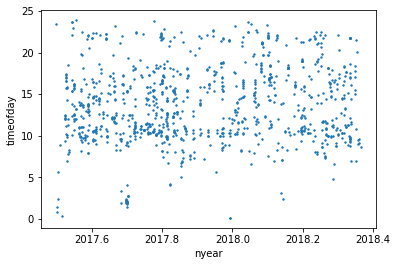

In [29]:
messages.plot.scatter('nyear','timeofday',s=2)

<AxesSubplot:>

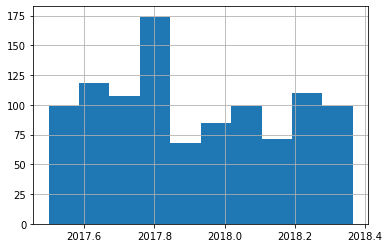

In [30]:
messages.nyear.hist()

<AxesSubplot:>

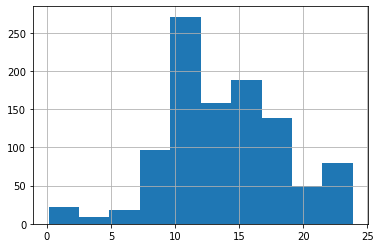

In [31]:
messages.timeofday.hist()

In [32]:
messages.dayofweek.value_counts()

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Sunday        33
Saturday      32
Name: dayofweek, dtype: int64

<AxesSubplot:>

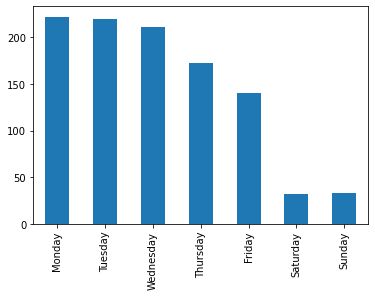

In [33]:
count = messages.dayofweek.value_counts(sort=False)
count.plot(kind='bar')